# Make predictions in production
This document shows how to make predictions by using the trained model. The metric objective is F1_score and a general accuracy for all classes. There are two types of F1_score, macro and weighted, weighted considers the classes unbalance and the other does not. In this case, classes are balanced.

The model is stored in Hugging Face, use the following link to download it:

https://huggingface.co/AntonioArteaga7/Fruits-Classifier/resolve/main/fruits_classifier.h5

This model should be downloaded and saved in folder 'models' as 'fruits_classifier.h5'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

2025-10-26 11:19:16.911145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 11:19:21.018528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 11:19:21.026191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 11:19:28.711006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# (height, width, channels)
input_shape = (224, 224, 3)
folder_models = '../models'
test_path = '../test'
batch_size = 8

In [3]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False           # IMPORTANT: Set False for evaluation purposes
)

Found 9 images belonging to 3 classes.


In [4]:
# Load the model
model = load_model(os.path.join(folder_models, 'fruits_classifier.h5'))

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
predicted_probs = np.max(predictions, axis=1)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Mapping: indexes → class names
class_indexes = test_generator.class_indices
classes = list(class_indexes.keys())

2025-10-26 11:19:44.417757: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2025-10-26 11:19:44.943771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2025-10-26 11:19:44.963553: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26615808 exceeds 10% of free system memory.
2025-10-26 11:19:44.984173: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2025-10-26 11:19:45.001350: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.


2/2 [==============================] - 3s 98ms/step


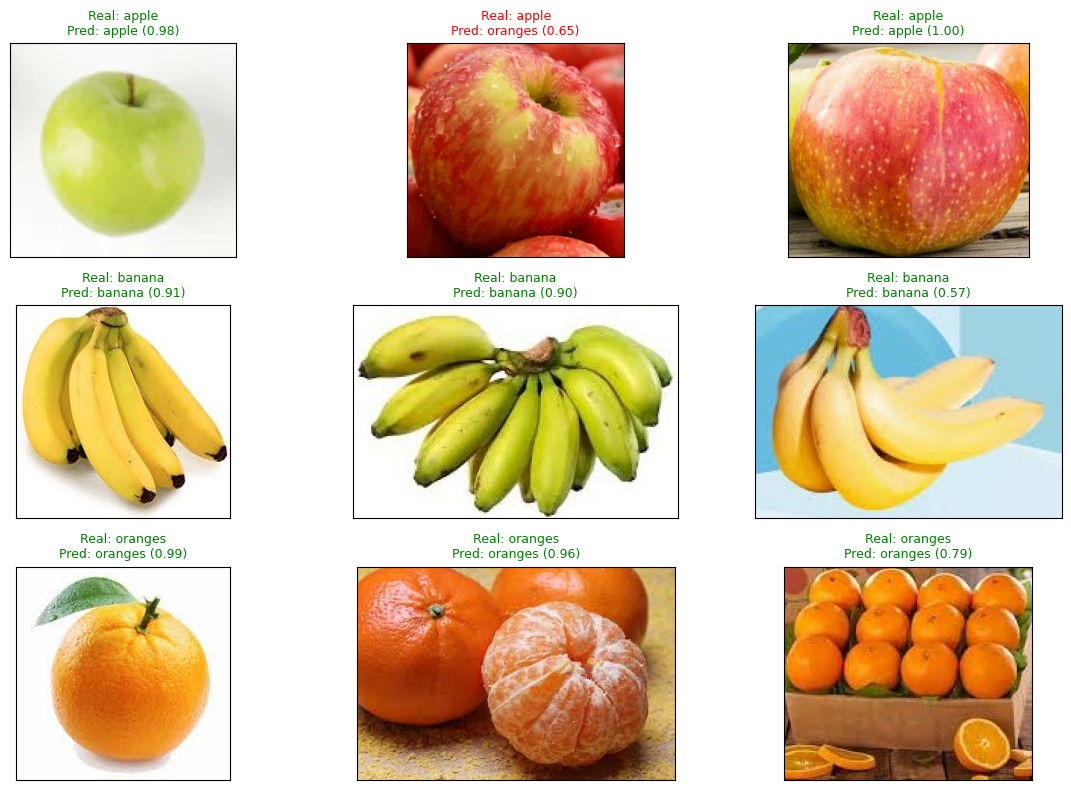

In [5]:
filenames = test_generator.filenames
true_labels = test_generator.classes
true_class_names = [classes[i] for i in true_labels]
pred_class_names = [classes[i] for i in predicted_classes]

nrows, ncols = 3, 3
num_images = nrows * ncols

figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for ax, img_path, label, pred, prob in zip(
        axes.ravel(),
        filenames[:num_images],
        true_class_names[:num_images],
        pred_class_names[:num_images],
        predicted_probs[:num_images]):

    img = plt.imread(os.path.join(test_path, img_path))
    ax.imshow(img)
    color = "green" if label == pred else "red"
    ax.set_title(f"Real: {label}\nPred: {pred} ({prob:.2f})",
                 fontsize=9, color=color)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
print("===== Classification Report =====")
print(classification_report(
    y_true, y_pred,
    target_names=list(test_generator.class_indices.keys()),
    digits=3
))

===== Classification Report =====
              precision    recall  f1-score   support

       apple      1.000     0.667     0.800         3
      banana      1.000     1.000     1.000         3
     oranges      0.750     1.000     0.857         3

    accuracy                          0.889         9
   macro avg      0.917     0.889     0.886         9
weighted avg      0.917     0.889     0.886         9



In [7]:
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"F1 macro (simple): {f1_macro:.3f}")
print(f"F1 weighted: {f1_weighted:.3f}")

F1 macro (simple): 0.886
F1 weighted: 0.886


Notice that both F1_scores are in the previous "Classification Report".

In [8]:
acc = accuracy_score(y_true, y_pred)
print(f"General Accuracy: {acc:.3f}")

General Accuracy: 0.889


## Conclusions
The general accuracy is 88.9%. Analyzing the f1_score for each class, it is obtained:
f1_score_apple = 0.8, f1_score_banana = 1 and f1_score_orange = 0.857. The performance of the model is acceptable. In order to improve the model performance, not only the batch size should be increase, but also the dataset quality. 